In [325]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.special import gamma
from sympy import diff, symbols, integrate, Rational, solve, Pow, limit
from scipy.integrate import quad
from numpy.random import normal
from scipy.stats import beta, norm

In [326]:
k, p, n = 20, 0.8, 16000

In [327]:
def comb(n, k):
    return math.factorial(k)/( math.factorial(k-n) * math.factorial(n))
Pk = [comb(j, k)*p**j*(1-p)**(k-j) for j in range(k+1)]
Uk = [sum(Pk[:i+1]) for i in range(len(Pk))]
print(Pk, Uk)

X = np.empty(n)
for i in range(n):
    p_val = np.random.rand()
    for j, value in enumerate(Uk):
        if p_val < value:
            X[i] = j
            break          
X = sorted(X)     
print(X)

[1.0485759999999954e-14, 8.388607999999964e-13, 3.187671039999988e-11, 7.650410495999974e-10, 1.3005697843199956e-08, 1.664729323929595e-07, 1.6647293239295955e-06, 1.3317834591436767e-05, 8.656592484433902e-05, 0.0004616849325031415, 0.002031413703013823, 0.0073869589200502685, 0.022160876760150806, 0.05454985048652509, 0.1090997009730502, 0.17455952155688037, 0.21819940194610052, 0.2053641430080947, 0.13690942867206315, 0.057646075230342396, 0.011529215046068483] [1.0485759999999954e-14, 8.493465599999964e-13, 3.2726056959999877e-11, 7.977671065599972e-10, 1.3803464949759954e-08, 1.8027639734271946e-07, 1.845005721272315e-06, 1.5162840312709081e-05, 0.0001017287651570481, 0.0005634136976601896, 0.0025948274006740127, 0.009981786320724282, 0.032142663080875086, 0.08669251356740018, 0.19579221454045037, 0.37035173609733074, 0.5885511380434313, 0.793915281051526, 0.9308247097235891, 0.9884707849539315, 1.0]
[np.float64(8.0), np.float64(9.0), np.float64(9.0), np.float64(9.0), np.float64(

In [328]:
alpha = 0.02
mex = np.mean(X)
Kx = mex * n
Beta1 = beta(a=np.sum(X), b=n*k - np.sum(X) + 1)
Beta2 = beta(a=np.sum(X)+1, b=n*k-np.sum(X))

p1 = Beta1.ppf(q=alpha/2)
p2 = Beta2.ppf(q=1-alpha/2)
print(p1, p2)

0.7973686452097271 0.8006677294789265


In [329]:
NormStd = norm(0, 1)
prl = mex/k + NormStd.ppf(alpha/2)/(k*(n*k)**0.5)*(mex*(k-mex))**0.5
prr = mex/k + NormStd.ppf(1 - alpha/2)/(k*(n*k)**0.5)*(mex*(k-mex))**0.5
print(prl, prr)

0.7973738894524306 0.8006698605475694


[0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 32, 113, 378, 859, 1780, 2835, 3498, 3289, 2134, 879, 196]


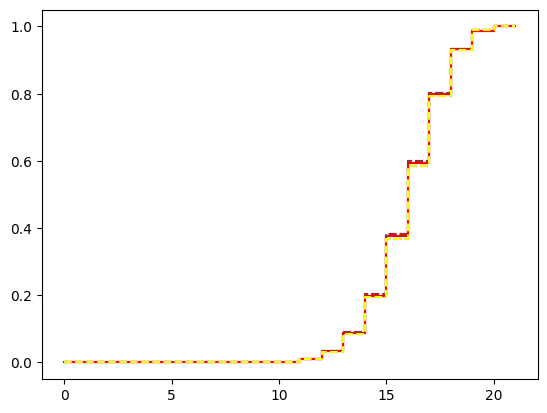

In [330]:
Pk1 = [comb(j, k)*p1**j*(1-p1)**(k-j) for j in range(k+1)]
Uk1 = [sum(Pk1[:i+1]) for i in range(len(Pk1))]

Pk2 = [comb(j, k) * p2 ** j * (1 - p2) ** (k - j) for j in range(k + 1)]
Uk2 = [sum(Pk2[:i + 1]) for i in range(len(Pk2))]

X = np.array(X)
F_emp = [len(np.where(X == i)[0]) for i in range(k+1)]
print(F_emp)
summa = sum(F_emp)
F_emp = [sum(F_emp[:i+1]) for i in range(len(F_emp))]
F = [x / summa for x in F_emp]

plt.close()
plt.step([i for i in range(k+2)], [0, *F], color="red")
plt.step([i for i in range(k+2)], [0, *Uk1], color="blue", linestyle="dashed")
plt.step([i for i in range(k+2)], [0, *Uk2], color="green", linestyle="dashed")

Pk1 = [comb(j, k)*prl**j*(1-prl)**(k-j) for j in range(k+1)]
Uk1 = [sum(Pk1[:i+1]) for i in range(len(Pk1))]

Pk2 = [comb(j, k) * prr ** j * (1 - prr) ** (k - j) for j in range(k + 1)]
Uk2 = [sum(Pk2[:i + 1]) for i in range(len(Pk2))]

plt.step([i for i in range(k+2)], [0, *F], color="red")
plt.step([i for i in range(k+2)], [0, *Uk1], color="brown", linestyle="dashed")
plt.step([i for i in range(k+2)], [0, *Uk2], color="yellow", linestyle="dashed")

[0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 32, 113, 378, 859, 1780, 2835, 3498, 3289, 2134, 879, 196]


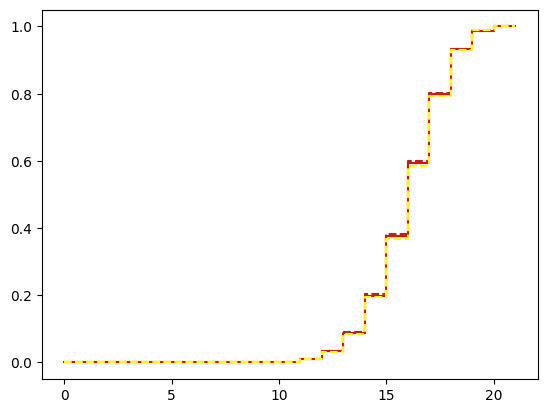

In [331]:
Pk1 = [comb(j, k)*prl**j*(1-prl)**(k-j) for j in range(k+1)]
Uk1 = [sum(Pk1[:i+1]) for i in range(len(Pk1))]

Pk2 = [comb(j, k) * prr ** j * (1 - prr) ** (k - j) for j in range(k + 1)]
Uk2 = [sum(Pk2[:i + 1]) for i in range(len(Pk2))]

F_emp = [len(np.where(X == i)[0]) for i in range(k+1)]
print(F_emp)
summa = sum(F_emp)
F_emp = [sum(F_emp[:i+1]) for i in range(len(F_emp))]
F = [x / summa for x in F_emp]

plt.close()
plt.step([i for i in range(k+2)], [0, *F], color="red")
plt.step([i for i in range(k+2)], [0, *Uk1], color="brown", linestyle="dashed")
plt.step([i for i in range(k+2)], [0, *Uk2], color="yellow", linestyle="dashed")

[np.float64(1.3618615627946681e-14), np.float64(1.085422839029323e-12), np.float64(4.1152860985843306e-11), np.float64(9.87161998768598e-10), np.float64(1.6808265340129603e-08), np.float64(2.1603116250853464e-07), np.float64(2.1759214738370147e-06), np.float64(1.7600534154546174e-05), np.float64(0.00011623305629975611), np.float64(0.0006337342800562008), np.float64(0.0028737783991855197), np.float64(0.010887170485827739), np.float64(0.03453711695489825), np.float64(0.09180739644983746), np.float64(0.20448868710923895), np.float64(0.3818522114592888), np.float64(0.5999578219949185), np.float64(0.8019015704345545), np.float64(0.934345381403945), np.float64(0.989205983452938), np.float64(0.9999999999999999)]
[np.float64(9.807363528125109e-15), np.float64(7.976817471100049e-13), np.float64(3.086227252108107e-11), np.float64(7.554337903124347e-10), np.float64(1.31247274301926e-08), np.float64(1.721146467725936e-07), np.float64(1.7686712077994224e-06), np.float64(1.4594605647420334e-05), np.

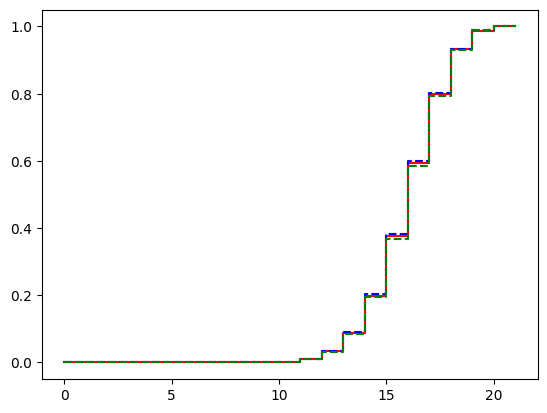

In [332]:
Pk1 = [comb(j, k) * p1**j * (1-p1)**(k-j) for j in range(k+1)]
Uk1 = [sum(Pk1[:i+1]) for i in range(len(Pk1))]
print(Uk1)

Pk2 = [comb(j, k) * p2 ** j * (1 - p2) ** (k - j) for j in range(k + 1)]
Uk2 = [sum(Pk2[:i + 1]) for i in range(len(Pk2))]
print(Uk2)

F_emp = [len(np.where(X == i)[0]) for i in range(k+1)]
print(F_emp)
summa = sum(F_emp)
F_emp = [sum(F_emp[:i+1]) for i in range(len(F_emp))]
F = [x / summa for x in F_emp]

plt.close()
plt.step([i for i in range(k+2)], [0, *F], color="red")
plt.step([i for i in range(k+2)], [0, *Uk1], color="blue", linestyle="dashed")
plt.step([i for i in range(k+2)], [0, *Uk2], color="green", linestyle="dashed")